In [9]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
np.set_printoptions(threshold=np.inf)

In [10]:
pos_data = np.load('pos_data.npy',allow_pickle=True)
neg_data = np.load('neg_data.npy',allow_pickle=True)
from sklearn.model_selection import train_test_split
X = np.vstack((pos_data,neg_data))
y = np.hstack((np.ones(len(pos_data)).astype(np.int),np.zeros(len(neg_data)).astype(np.int)))

C:\Users\XAVIER~1\AppData\Local\Temp/ipykernel_10228/3902692758.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.hstack((np.ones(len(pos_data)).astype(np.int),np.zeros(len(neg_data)).astype(np.int)))


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

x_train.shape (2199, 32, 32, 3)


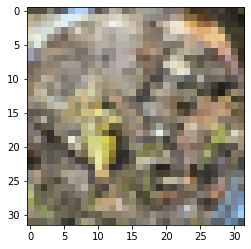

In [12]:
plt.imshow(x_train[0])  # 绘制图片
plt.show()

In [14]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  # 给数据增加一个维度，使数据和网络结构匹配
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
print("x_train.shape", x_train.shape)

x_train.shape (2199, 32, 32, 3)


In [25]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(2, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

In [48]:
model = LeNet5()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0731 - val_sparse_categorical_accuracy: 0.9862
Epoch 2/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0740 - val_sparse_categorical_accuracy: 0.9862
Epoch 3/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9862
Epoch 4/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9862
Epoch 5/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0739 - val_sparse_categorical_accuracy: 0.9862
Epoch 6/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0750 - sparse_categorical_accuracy: 

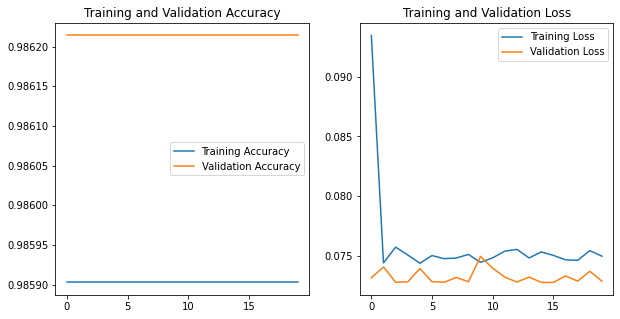

In [49]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [50]:
threshold = 0.5
pre = model.predict(x_test)
pre_result = np.zeros_like(y_test).astype(np.int)
for i in range(len(pre)):
    if pre[i][1] >= threshold:
        pre_result[i] = 1

C:\Users\XAVIER~1\AppData\Local\Temp/ipykernel_10228/4206567905.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pre_result = np.zeros_like(y_test).astype(np.int)


In [51]:
acc = 1 - np.sum(np.abs((y_test - pre_result)))/y_test.shape[0]
print('Accuracy:',acc)

Accuracy: 0.9862142099681867
